## 1- EDA : Exploring the Data for Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl 
import imblearn as imb



In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

For_submition_1 = pd.read_csv('train.csv')
For_submition_2 =  pd.read_csv('test.csv')

In [3]:

print(train_df.shape)
train_df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test_df.shape)
test_df.head()



(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2.2 Cleaning Train Data:

In [5]:
# droping PassengerId and Ticket columns and Name column

train_df.drop(['PassengerId','Ticket','Name','Embarked','Cabin'],axis=1,inplace=True)
test_df.drop(['PassengerId','Ticket','Name','Embarked','Cabin'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
#plot_df = train_df.copy()   
#le = LabelEncoder() 
#le2 = LabelEncoder()
#le.fit(list(plot_df['Sex'].unique()))
#
#plot_df['Sex'] = le.transform(plot_df['Sex'])
#
#plot_df

In [7]:
#plt.figure(figsize=(6,6))
#sns.catplot(y='Age',x='Survived',data=plot_df,kind='violin',height=5,aspect=2)

GridSpec(6, 6)

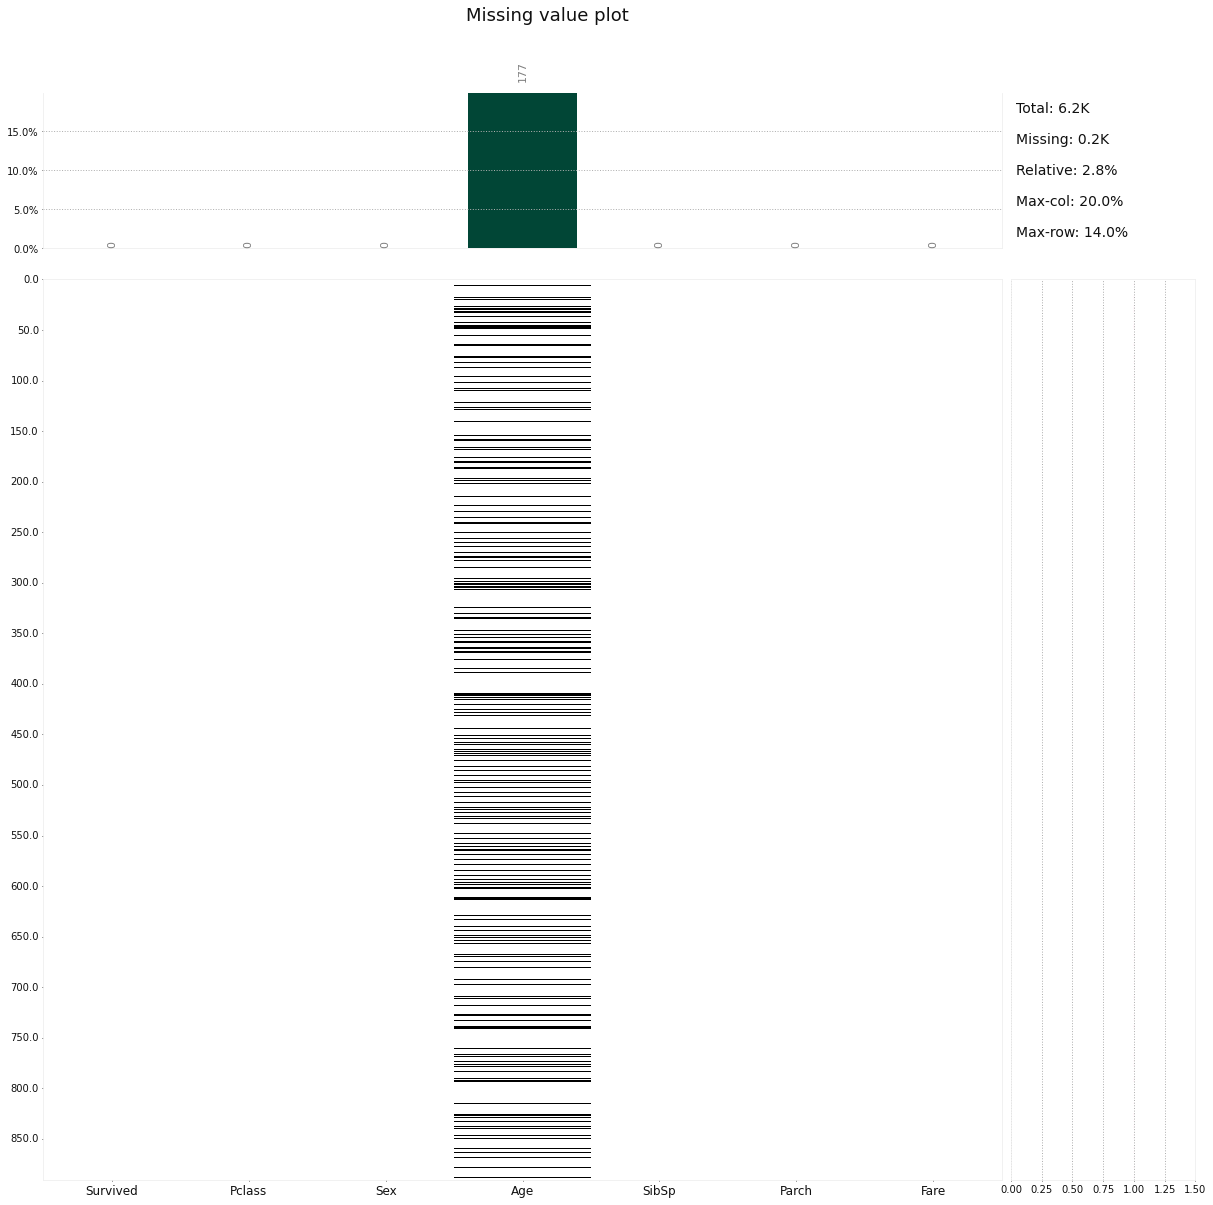

In [8]:
kl.missingval_plot(train_df)

In [9]:
for i in train_df.columns:
    print(i,' : ')
    print(train_df[i].value_counts())

Survived  : 
0    549
1    342
Name: Survived, dtype: int64
Pclass  : 
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex  : 
male      577
female    314
Name: Sex, dtype: int64
Age  : 
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
SibSp  : 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch  : 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Fare  : 
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


## 2.2 Cleaning Test Data:

GridSpec(6, 6)

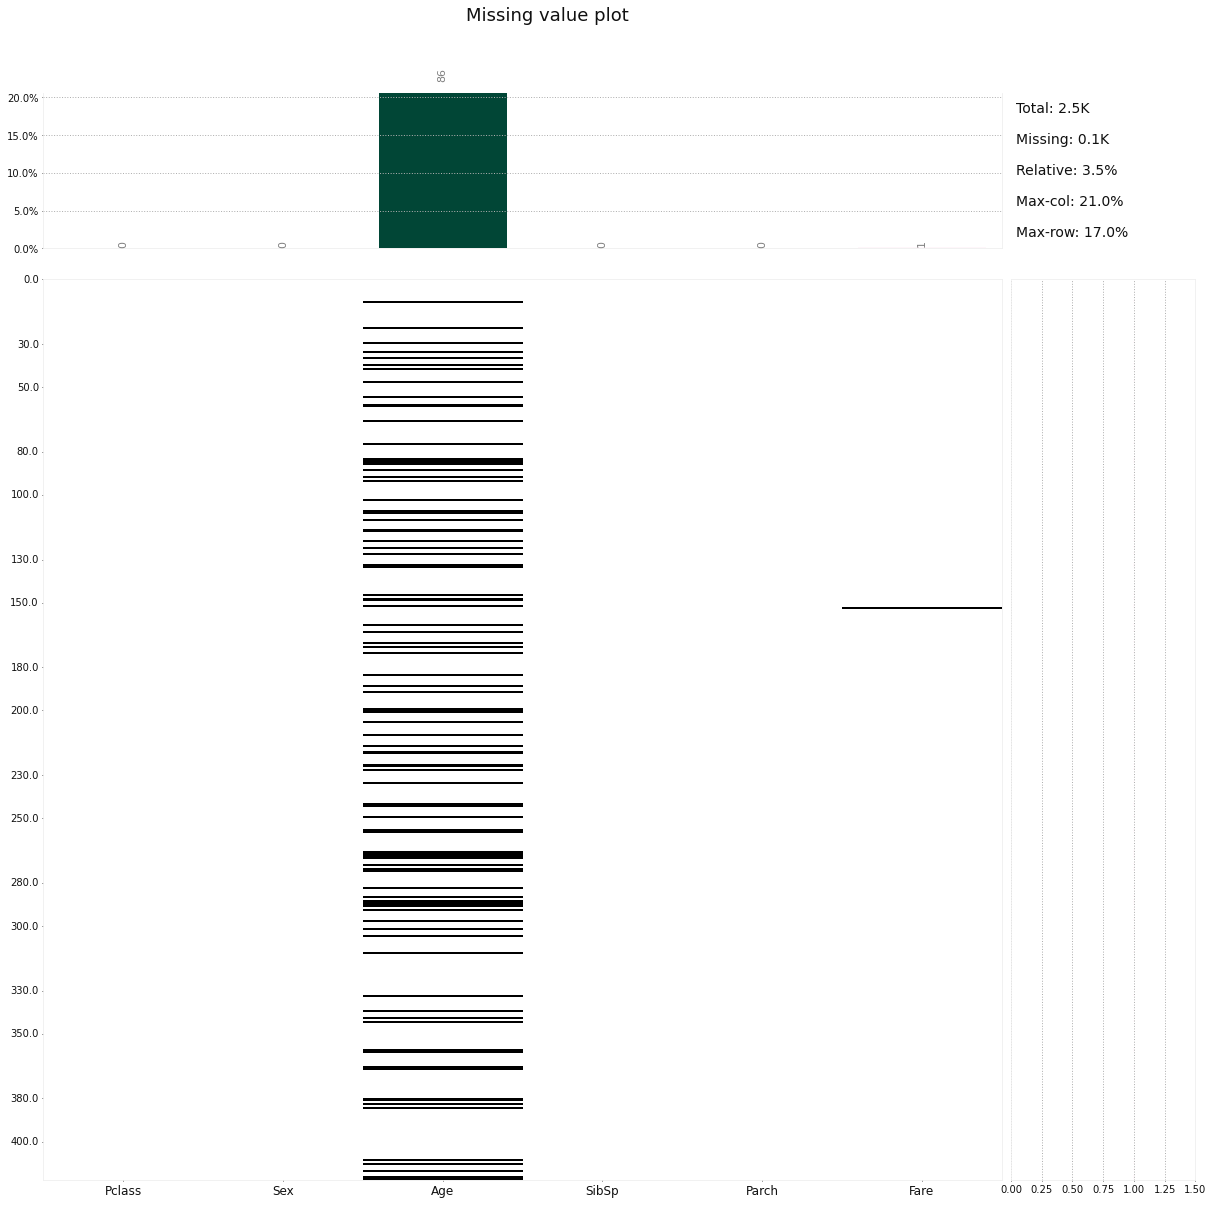

In [10]:

kl.missingval_plot(test_df)

In [11]:
# fill missing values

train_df.dropna(subset=['Age'],inplace=True)


test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)




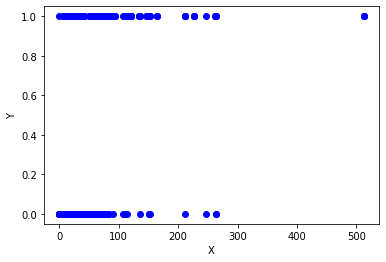

In [12]:
plt.scatter(train_df.Fare, train_df.Survived,  color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



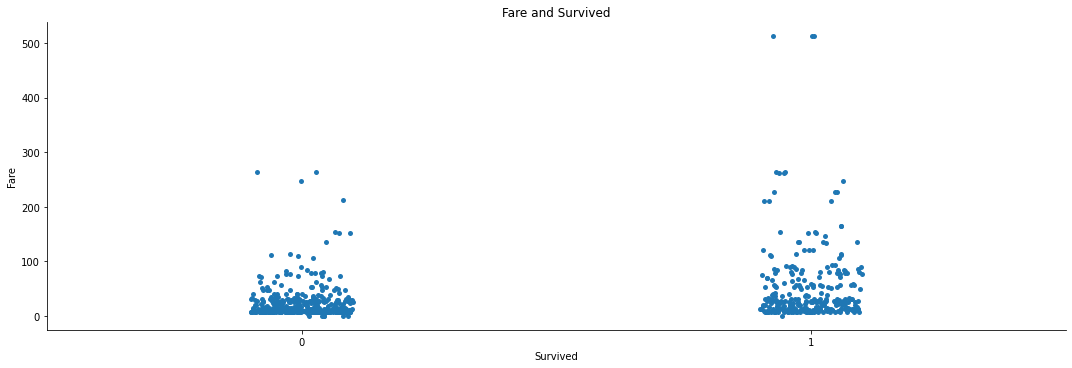

In [13]:
# create catplot with seaborn for Fare and Survived
sns.catplot(y="Fare", x="Survived", data=train_df, kind="strip", height=5, aspect=3) 
plt.ylabel('Fare')
plt.xlabel('Survived')
plt.title('Fare and Survived')
plt.show()

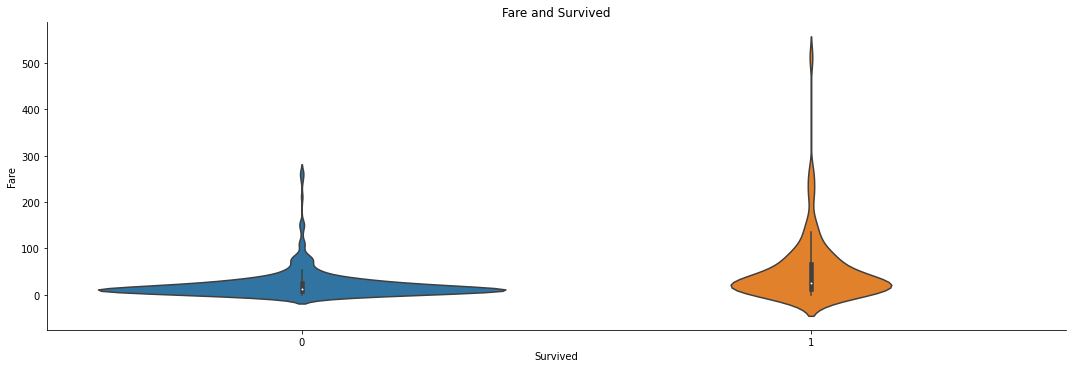

In [14]:
# create catplot with seaborn for Fare and Survived
sns.catplot(y="Fare", x="Survived", data=train_df, kind="violin", height=5, aspect=3) 
plt.ylabel('Fare')
plt.xlabel('Survived')
plt.title('Fare and Survived')
plt.show()

## 2-3 Last Processing Phase :


In [15]:
le = LabelEncoder() 
xx= train_df['Sex'].unique()
le.fit(xx)
train_df['Sex'] = le.transform(train_df['Sex'])
test_df['Sex']= le.transform(test_df['Sex'])


<AxesSubplot: xlabel='Fare', ylabel='Density'>

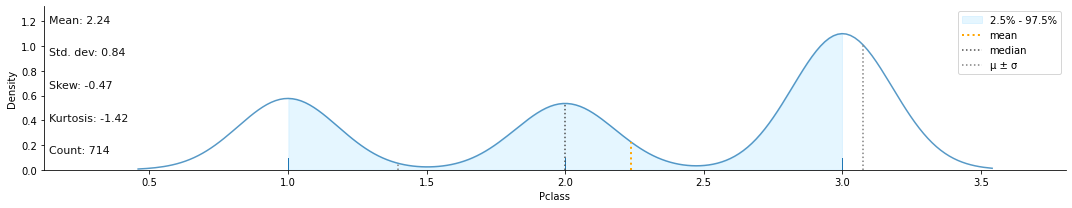

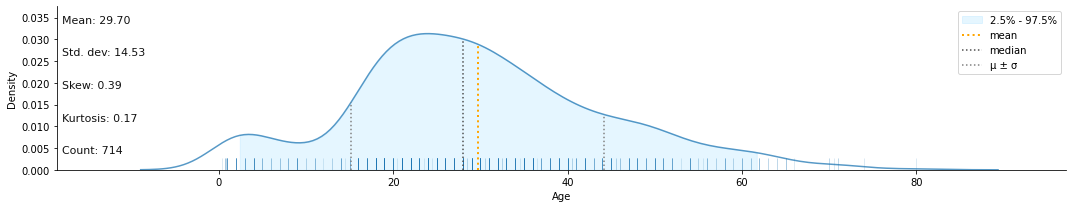

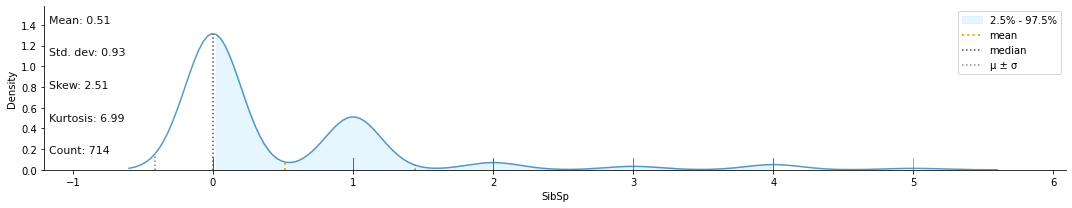

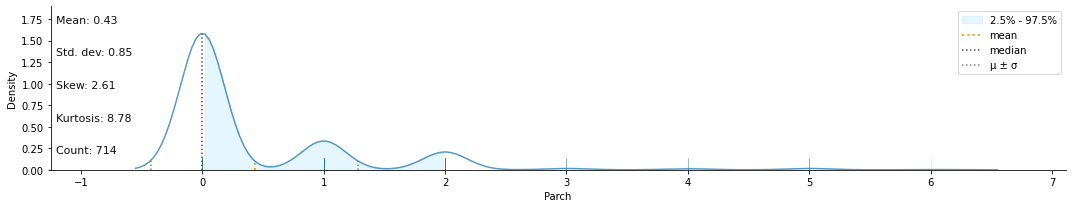

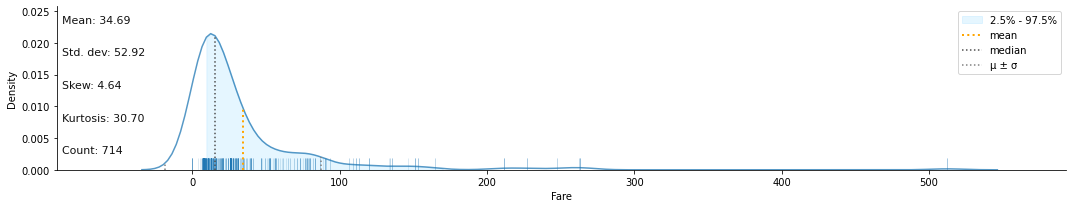

In [16]:
kl.dist_plot(train_df)

In [17]:
# split data

train_y = train_df['Survived']
train_x = train_df.drop(['Survived'], axis=1)

test_x = test_df

In [18]:
# print shape before resampling
print('X :',train_x.shape,'Y :', train_y.shape)

smote = imb.over_sampling.RandomOverSampler(sampling_strategy='not majority')
train_x, train_y = smote.fit_resample(train_x, train_y)

# print after resampling
print('X: ',train_x.shape,' y:',train_y.shape)
train_x.head()


#random under sampling
#rus = imb.under_sampling.RandomUnderSampler(sampling_strategy='not minority')
#train_x, train_y = rus.fit_resample(train_x, train_y)



X : (714, 6) Y : (714,)
X:  (848, 6)  y: (848,)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


<AxesSubplot: xlabel='Fare', ylabel='Density'>

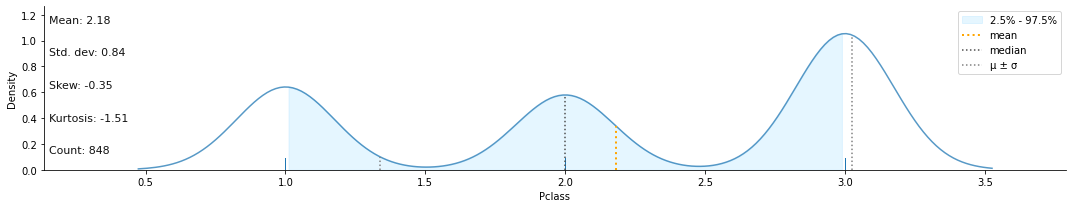

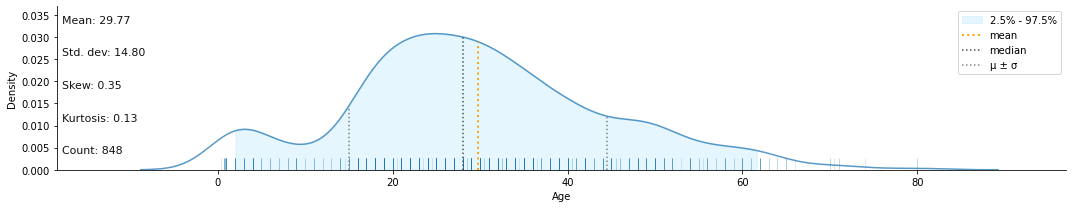

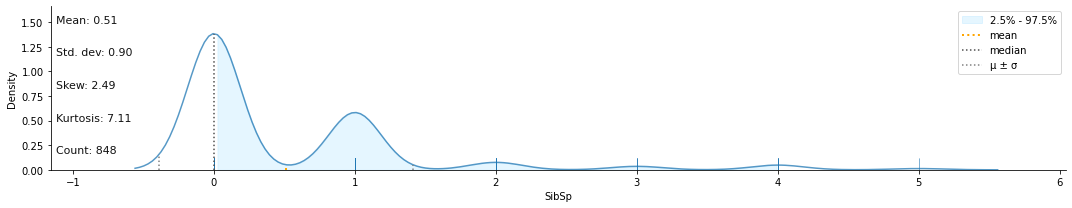

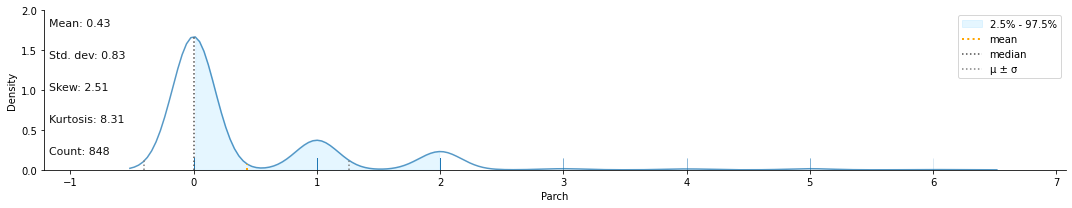

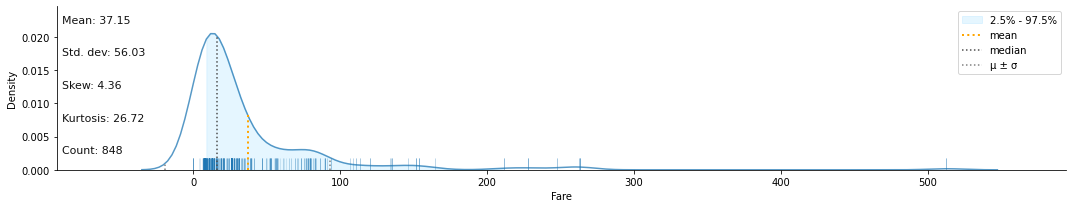

In [19]:
kl.dist_plot(train_x)

In [20]:
#encode categorical data with one hot encoding

#train_x = pd.get_dummies(train_x)
#test_x = pd.get_dummies(test_x)


#print('X: ',train_x.shape,' y:',train_y.shape)

In [21]:
#normalize data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)


print(train_x.shape)
print(test_x.shape)

(848, 6)
(418, 6)


In [22]:
# kkn model to predict survival
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, test_size=0.2, random_state=4)

k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh2   =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',  metric_params=None, n_jobs=1, n_neighbors=k, p=2, weights='uniform')
neigh.fit(X_train, y_train)
neigh2.fit(X_train,y_train)    

#evaluation
yhat = neigh.predict(X_test)
yhat2 = neigh2.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))



Train set Accuracy:  0.8805309734513275
Test set Accuracy:  0.7823529411764706
Train set Accuracy:  0.8805309734513275
Test set Accuracy:  0.7823529411764706


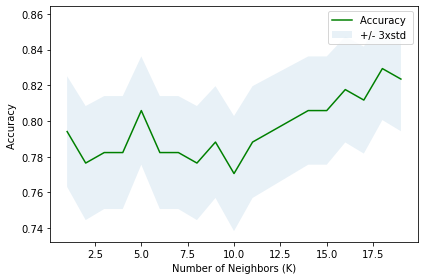

The best accuracy was with 0.8294117647058824 with k= 18


In [23]:
# create a loop that do the same thing for k = 1 to 10 and takes the best k for testing accuracy
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
        
        #Train Model and Predict  
        neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
        
    
        
        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#plot the accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


Confusion matrix, without normalization
[[70 15]
 [12 73]]
Confusion matrix, without normalization
[[57 28]
 [ 9 76]]
Confusion matrix, without normalization
[[64 21]
 [10 75]]
Confusion matrix, without normalization
[[61 24]
 [ 7 78]]
Confusion matrix, without normalization
[[70 15]
 [12 73]]
Confusion matrix, without normalization
[[60 25]
 [13 72]]
Confusion matrix, without normalization
[[53 32]
 [ 7 78]]
Confusion matrix, without normalization
[[56 29]
 [ 7 78]]
Confusion matrix, without normalization
[[65 20]
 [10 75]]
Confusion matrix, without normalization
[[62 23]
 [14 71]]
Confusion matrix, without normalization
[[65 20]
 [13 72]]
Confusion matrix, without normalization
[[64 21]
 [14 71]]
Confusion matrix, without normalization
[[62 23]
 [11 74]]
Confusion matrix, without normalization
[[60 25]
 [15 70]]
Confusion matrix, without normalization
[[67 18]
 [15 70]]
Confusion matrix, without normalization
[[67 18]
 [17 68]]
Confusion matrix, without normalization
[[70 15]
 [17 68

C:\Users\khald\AppData\Local\Temp\ipykernel_3148\2381575330.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))


Confusion matrix, without normalization
[[70 15]
 [14 71]]
Confusion matrix, without normalization
[[70 15]
 [15 70]]
Confusion matrix, without normalization
[[71 14]
 [16 69]]
Confusion matrix, without normalization
[[69 16]
 [15 70]]
Confusion matrix, without normalization
[[69 16]
 [16 69]]
Confusion matrix, without normalization
[[67 18]
 [14 71]]
Confusion matrix, without normalization
[[71 14]
 [15 70]]
Confusion matrix, without normalization
[[67 18]
 [15 70]]
Confusion matrix, without normalization
[[71 14]
 [15 70]]
No value of max_depth and ccp_alpha gives an accuracy greater than 0.85


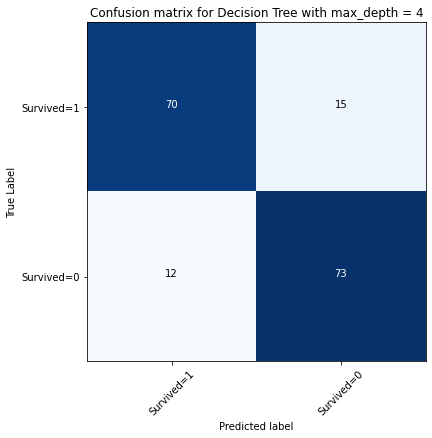

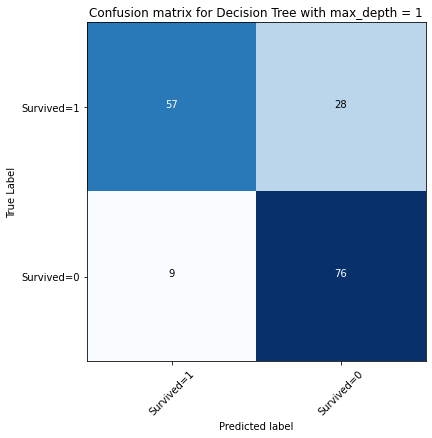

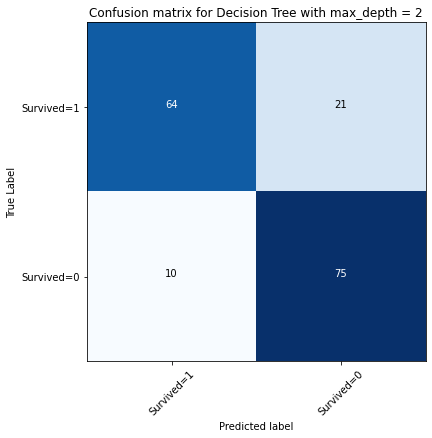

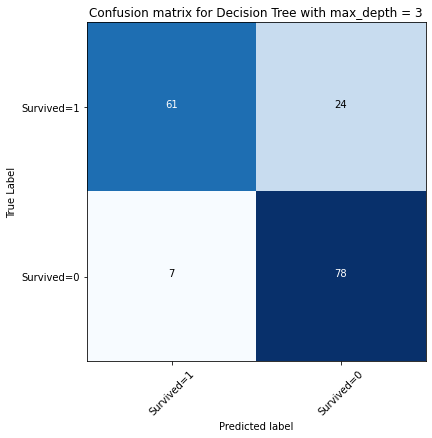

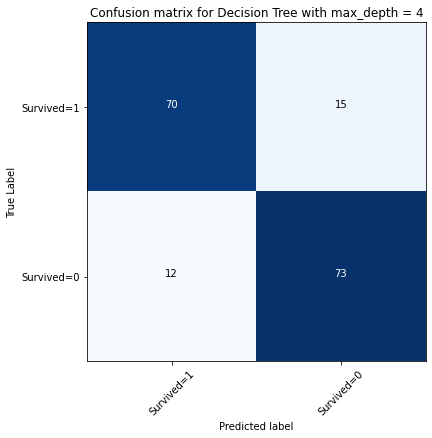

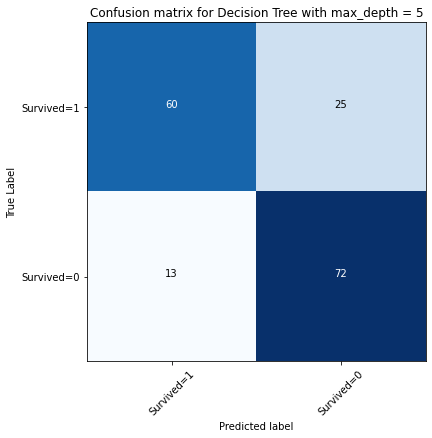

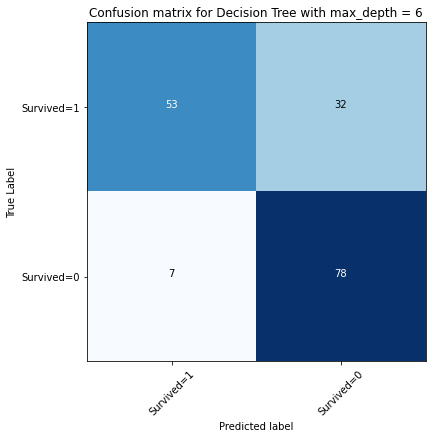

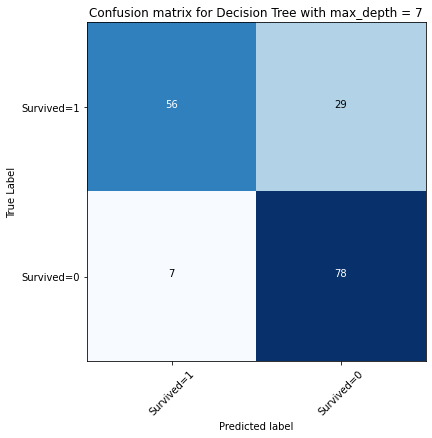

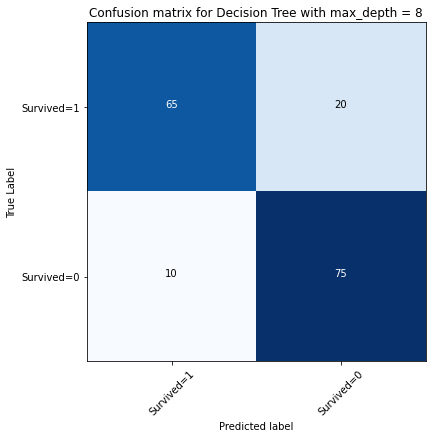

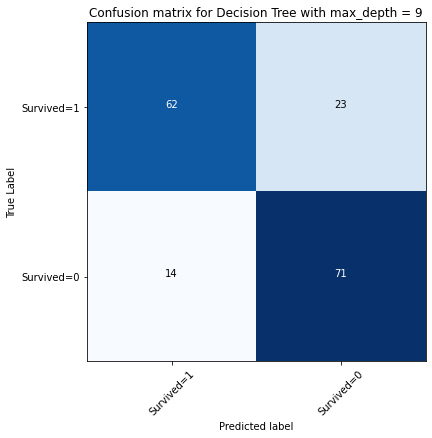

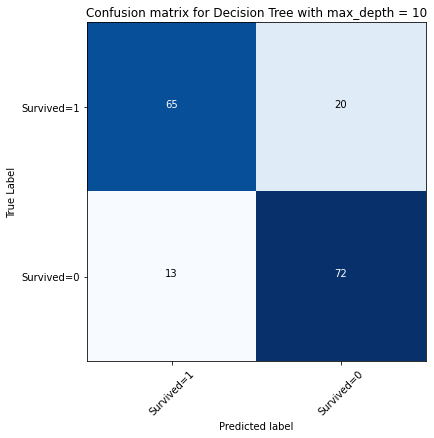

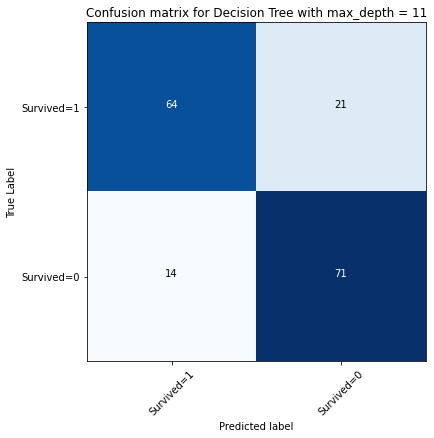

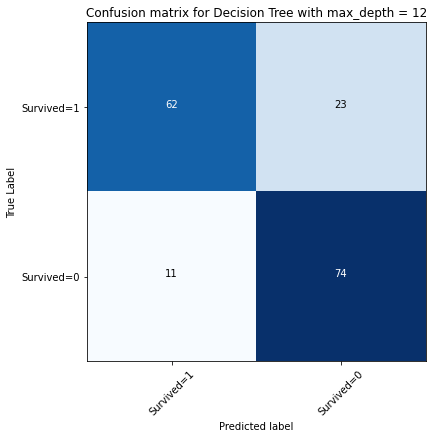

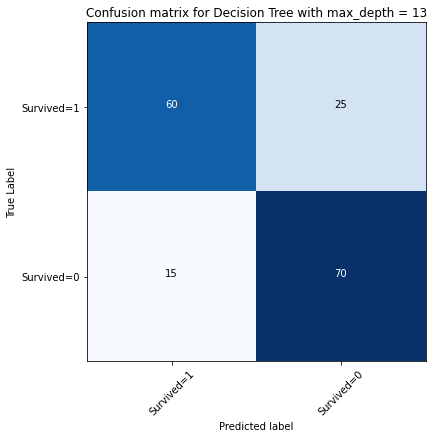

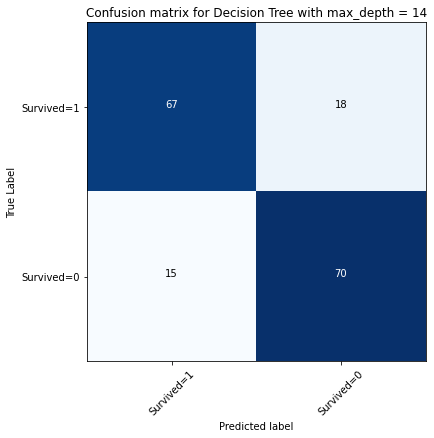

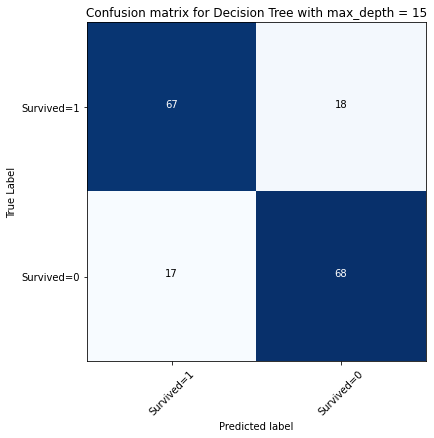

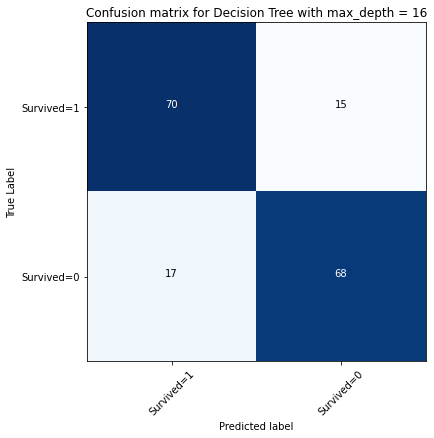

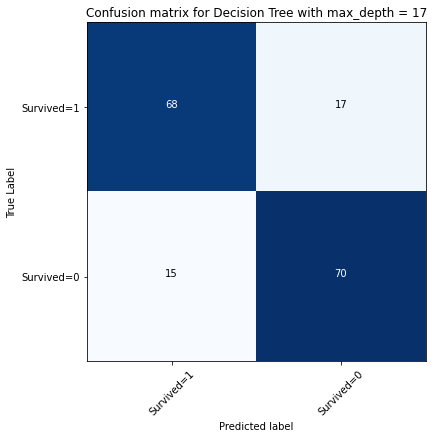

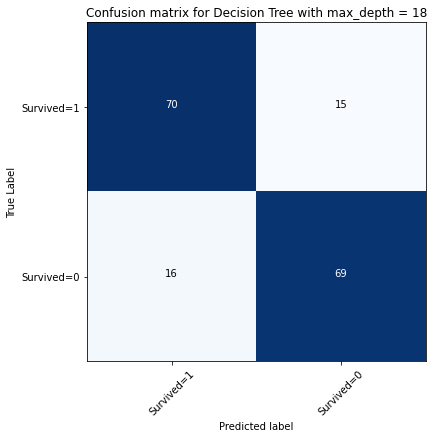

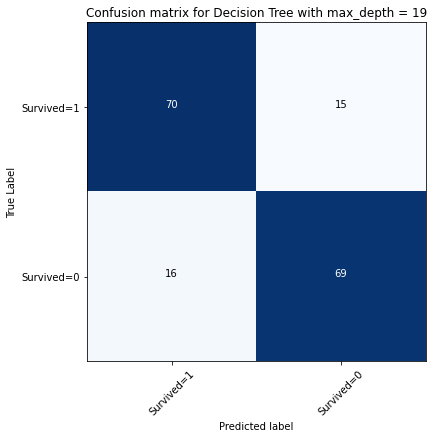

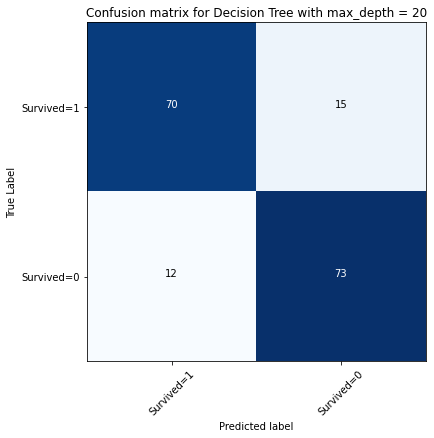

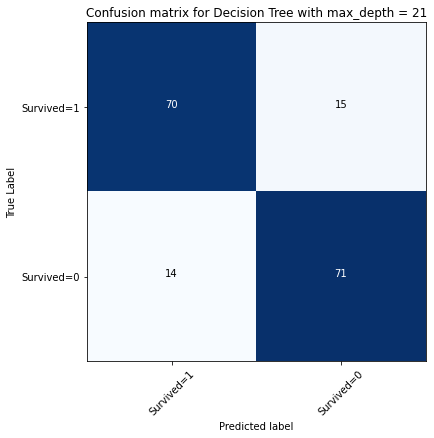

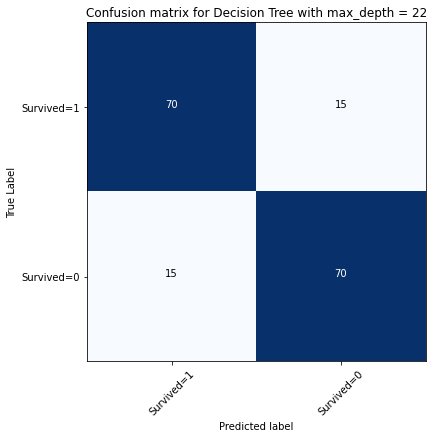

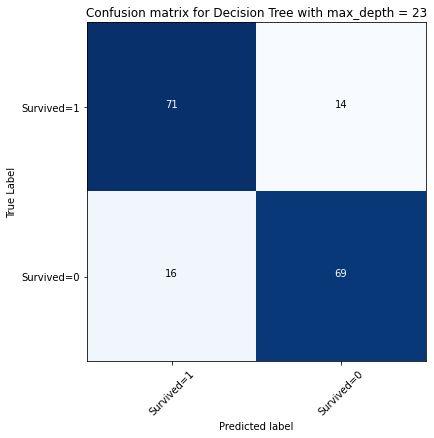

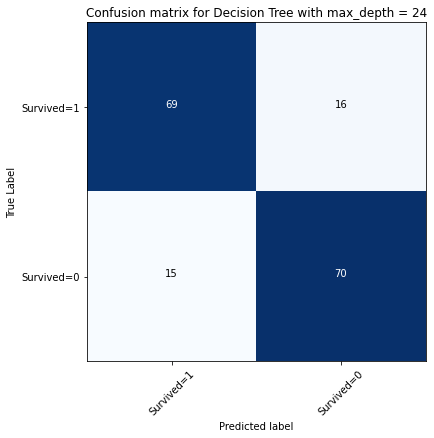

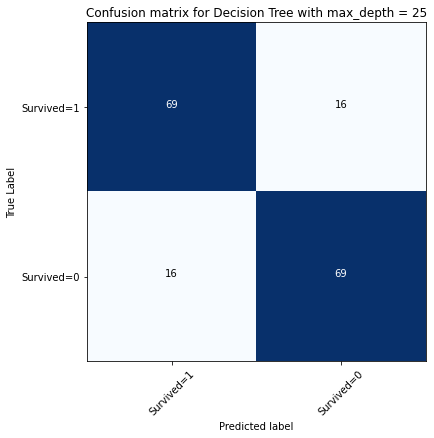

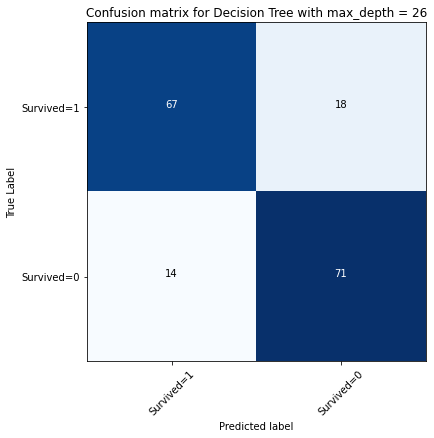

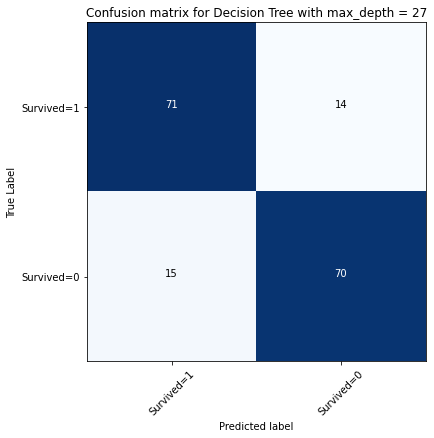

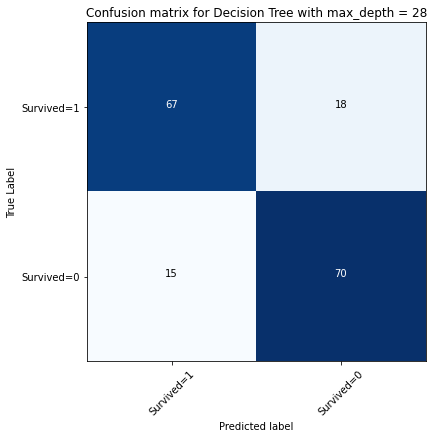

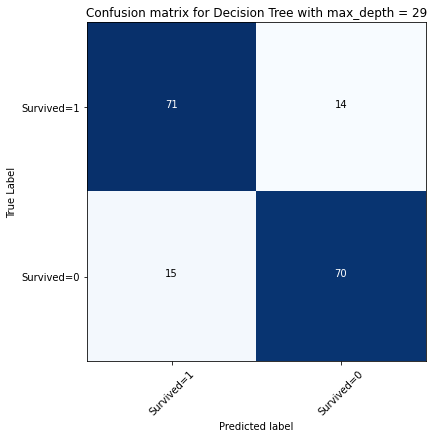

In [24]:
#  decision tree
from sklearn.tree import DecisionTreeClassifier     
from sklearn import metrics 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def DecisionTreeClassifierModel(mx_dpth,ccp_a): 

    drugTree = DecisionTreeClassifier(criterion="gini", max_depth = mx_dpth,ccp_alpha=ccp_a)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    ydf = pd.Series(drugTree.predict(test_x),name='Survived').astype(int)
    ydf = pd.concat([For_submition_2['PassengerId'], ydf], axis=1)
    ydf.to_csv('submission2.csv', index=False)


    f1_scor = f1_score(y_test, predTree, average='weighted')
    
    
    #evaluation
    
    #print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
    #print("Jaccard score: ", jaccard_score(y_test, predTree))
    #print("F1-score: ", f1_score(y_test, predTree, average='weighted'))     




    #confusion matrix
    
    
    cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,0])
    np.set_printoptions(precision=2)



    plt.figure(figsize=(6,6)) 
  
    plot_confusion_matrix(mx_dpth,cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix')
    


 
   
  
    #from sklearn import tree
    #plt.figure(figsize=(10,10))
    #tree.plot_tree(drugTree,fontsize=10)
    
    
    return f1_scor
    

def plot_confusion_matrix(awdi,cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for Decision Tree with max_depth = {}'.format(awdi))

    

DecisionTreeClassifierModel(4,0)



list = []
for i in range(1,30):
    if DecisionTreeClassifierModel(i,0)>0.85:
        list.append(DecisionTreeClassifierModel(i,0))
        print("max_depth = ",i,"ccp_alpha = ",0)
        print("")
        
        
if len(list) == 0:
    print("No value of max_depth and ccp_alpha gives an accuracy greater than 0.85")  
else:          
    print(max(list))    

In [25]:
#  logistic regression 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score

def LogisticRegressionModel(C, solver):
    LR = LogisticRegression(C=C, solver=solver,penalty='elasticnet',max_iter=400,l1_ratio=0.9).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)
    #print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    #print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob))



    return f1_score(y_test, yhat, average='weighted')



for i in np.arange(0.001,1,0.01):
    for j in [   'saga']:

        x =LogisticRegressionModel(i,j)
        
        if x > 0.83:            
            print("C = ",i,"solver = ",j)
            print("")
            print("")
            print('f1_score = ',x)


In [26]:
# SVM

from sklearn import svm


def SVMModel(ker,degr): 
    clf = svm.SVC(C=0.76,kernel=ker, degree=degr)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    ydf = pd.Series(clf.predict(test_x),name='Survived').astype(int)
    ydf = pd.concat([For_submition_2['PassengerId'], ydf], axis=1)
    ydf.to_csv('submission3.csv', index=False)
    #print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    return f1_score(y_test, yhat, average='weighted')

for i in ['poly','rbf']:
    for j in range(1,5):
        x = SVMModel(i,j)
        if x > 0.80:
            print("kernel = ",i,"degree = ",j)
            print("")
            print("")
            print('f1_score = ',x)
            




    
             

kernel =  poly degree =  3


f1_score =  0.8096304591265399
kernel =  rbf degree =  1


f1_score =  0.8280732345248476
kernel =  rbf degree =  2


f1_score =  0.8280732345248476
kernel =  rbf degree =  3


f1_score =  0.8280732345248476
kernel =  rbf degree =  4


f1_score =  0.8280732345248476


In [27]:
#  random forest

from sklearn.ensemble import RandomForestClassifier


def RandomForestModel(n_est,ccp_a):
    clf = RandomForestClassifier(n_estimators=n_est, ccp_alpha=ccp_a)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    #print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    return f1_score(y_test, yhat, average='weighted')

for i in range(1,100):  
    x = RandomForestModel(i,0)
    if x > 0.87:
        print("n_estimators = ",i)
        print("")
        print("")
        print('f1_score = ',x)

n_estimators =  18


f1_score =  0.8763636363636363
n_estimators =  19


f1_score =  0.8764663137132773
n_estimators =  25


f1_score =  0.8882314266929651
n_estimators =  28


f1_score =  0.8763636363636363
n_estimators =  29


f1_score =  0.8764321068844969
n_estimators =  30


f1_score =  0.8704268292682925
n_estimators =  31


f1_score =  0.8705165489544386
n_estimators =  32


f1_score =  0.8823366555924695
n_estimators =  35


f1_score =  0.8705703211517165
n_estimators =  36


f1_score =  0.8764321068844969
n_estimators =  39


f1_score =  0.8941029900332226
n_estimators =  43


f1_score =  0.8705703211517165
n_estimators =  44


f1_score =  0.8705165489544386
n_estimators =  46


f1_score =  0.8705703211517165
n_estimators =  47


f1_score =  0.8704268292682925
n_estimators =  50


f1_score =  0.8882004776574018
n_estimators =  52


f1_score =  0.8822877717767622
n_estimators =  57


f1_score =  0.8882314266929651
n_estimators =  60


f1_score =  0.8705703211517165
n_estimators

In [28]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Naive Bayes's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Jaccard score: ", jaccard_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))







Naive Bayes's Accuracy:  0.788235294117647
Jaccard score:  0.625
F1-score:  0.7867892976588631


In [36]:
# do same model with xgboost

import xgboost as xgb
def XgboostModel(mx_dpth,n_est):
    clf = xgb.XGBClassifier(max_depth=mx_dpth,n_estimators=n_est)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    #print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test, yhat))
    #print("Jaccard score: ", jaccard_score(y_test, yhat))
    #print("F1-score: ", f1_score(y_test, yhat, average='weighted'))
    return f1_score(y_test, yhat, average='weighted')




#try the XgboostModel with different parameters and find the best one

lst = []
for i in range(1,10):
    for j in range(1,50):
        for k in range(1,10):
        
            x = XgboostModel(i,j)
            if x > 0.8586:
                lst.append({'max_depth':i,'n_estimators':j,'f1_score':x})
                #print("n_estimators = ",i,"ccp_alpha = ",j,"max_depth = ",k)
                #print("")
                #print("")
                #print('f1_score = ',x)
if len(lst) == 0:
    print("No value of max_depth and ccp_alpha gives an accuracy greater than 0.86")
else:
    print(lst)

[{'max_depth': 3, 'n_estimators': 13, 'f1_score': 0.8644761013483069}, {'max_depth': 3, 'n_estimators': 14, 'f1_score': 0.8644761013483069}, {'max_depth': 3, 'n_estimators': 19, 'f1_score': 0.8644761013483069}, {'max_depth': 5, 'n_estimators': 18, 'f1_score': 0.8644761013483069}, {'max_depth': 5, 'n_estimators': 19, 'f1_score': 0.8586474501108645}]


In [39]:
xgb_model = xgb.XGBClassifier(max_depth=5,n_estimators=18)
xgb_model.fit(train_x, train_y)
#y_pred = xgb_model.predict(X_test)
ydf = pd.Series(xgb_model.predict(test_x),name='Survived').astype(int)
ydf = pd.concat([For_submition_2['PassengerId'], ydf], axis=1)
ydf.to_csv('submission4.csv', index=False)
    



In [31]:
#  neural network with tensorflow

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K

 
 
# prepre data for input shape




 
def NeuralNetworkModel():
    model = keras.Sequential([
    layers.Dense(160, activation='relu', input_shape=[(X_train.shape[1])]),
    layers.Dense(110, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=800, verbose=0)
    model.summary()
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    #print("Neural Network's Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    #print("Jaccard score: ", jaccard_score(y_test, y_pred))
    #print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))
    return f1_score(y_test, y_pred, average='weighted')


x = NeuralNetworkModel()    
print('f1_score = ',x)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1120      
                                                                 
 dense_1 (Dense)             (None, 110)               17710     
                                                                 
 dense_2 (Dense)             (None, 5)                 555       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 19,391
Trainable params: 19,391
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 0s 3ms/step
f1_score =  0.7882059800664452
